In [1]:
from coactivation.process import preprocess_emgs, get_coactivation_map, get_coactivation_difference, get_all_healthy_map, get_coactivation_bool_map, get_alignment_map, array_to_cm,generate_coactivation_csv, emgs
from coactivation.visualize import visualize_emgs, plot_coactivation_corr, plot_coactivation_map, plot_bool_map, plot_alignment_map

import pandas as pd
import numpy as np

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix


from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

In [2]:
generate_coactivation_csv()

# Preprocessing

In [3]:
df_raw = pd.read_csv('coactivations.csv', index_col=0)

In [4]:
df_raw = df_raw[df_raw.subject_id!='Augmen']

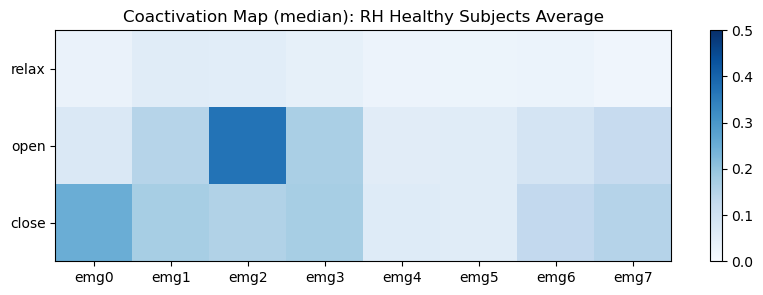

In [5]:
df_lh = df_raw[(df_raw.subject_id!='Augmen') & (df_raw.is_patient==False) & (df_raw.hand=='right')]
plot_coactivation_map(array_to_cm(np.mean(df_lh.iloc[:,:24], axis=0).values), title='RH Healthy Subjects Average')

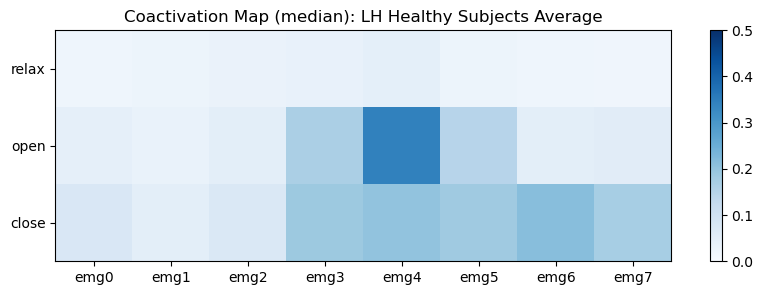

In [6]:
df_lh = df_raw[(df_raw.subject_id!='Augmen') & (df_raw.is_patient==False) & (df_raw.hand=='left')]
plot_coactivation_map(array_to_cm(np.mean(df_lh.iloc[:,:24], axis=0).values), title='LH Healthy Subjects Average')

In [7]:
df_raw[(df_raw.subject_id!='Augmen') & (df_raw.is_patient==False) & (df_raw.hand=='right')]

,gt0emg0,gt0emg1,gt0emg2,gt0emg3,gt0emg4,gt0emg5,gt0emg6,gt0emg7,gt1emg0,gt1emg1,...,gt2emg2,gt2emg3,gt2emg4,gt2emg5,gt2emg6,gt2emg7,hand,is_patient,subject_id,n
0,0.041379,0.115271,0.056158,0.025616,0.026601,0.026601,0.028571,0.026601,0.073892,0.253202,...,0.141872,0.138916,0.051232,0.032512,0.040394,0.107389,right,False,xw,11
0,0.034598,0.092634,0.042411,0.027902,0.029018,0.027902,0.029018,0.027902,0.071429,0.262277,...,0.159598,0.175223,0.060268,0.036830,0.053571,0.166853,right,False,xw,11
0,0.022923,0.027698,0.047755,0.032474,0.031519,0.024833,0.023878,0.022923,0.053486,0.111748,...,0.126074,0.117956,0.050621,0.029608,0.034384,0.094556,right,False,xw,13
0,0.027174,0.031522,0.032609,0.039130,0.045652,0.033696,0.033696,0.028261,0.058696,0.100000,...,0.236957,0.170652,0.069565,0.042391,0.044565,0.106522,right,False,xw,13
0,0.012903,0.014194,0.015484,0.018710,0.017419,0.039355,0.016129,0.013548,0.029677,0.018065,...,0.023871,0.071613,0.071613,0.163226,0.154839,0.083548,right,False,ae,13
0,0.012739,0.014013,0.014650,0.017834,0.020382,0.064331,0.022293,0.014650,0.034395,0.018471,...,0.022930,0.076433,0.083439,0.165605,0.117197,0.075796,right,False,ae,13
0,0.017241,0.018966,0.018966,0.024138,0.029310,0.064655,0.093966,0.027586,0.047414,0.025862,...,0.024138,0.053448,0.067241,0.193103,0.231897,0.098276,right,False,ae,11
0,0.014154,0.014862,0.014862,0.017693,0.021231,0.036801,0.062987,0.023355,0.029724,0.021231,...,0.021231,0.060863,0.062987,0.157820,0.165959,0.088464,right,False,ae,11
0,0.048438,0.050000,0.051562,0.057813,0.032813,0.029687,0.028125,0.028125,0.101562,0.203125,...,0.084375,0.125781,0.045312,0.034375,0.034375,0.085938,right,False,hr,11
0,0.053846,0.043590,0.044872,0.035897,0.025641,0.023077,0.023077,0.023077,0.087179,0.166667,...,0.070513,0.102564,0.034615,0.026923,0.026923,0.073077,right,False,hr,11


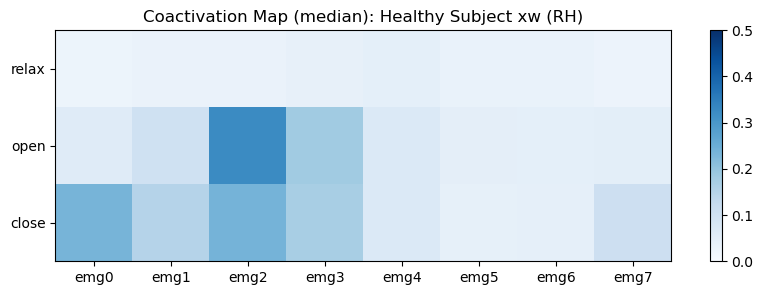

In [8]:
plot_coactivation_map(array_to_cm(df_raw[(df_raw.subject_id!='Augmen') & (df_raw.is_patient==False) & (df_raw.hand=='right')].iloc[3,:24].values).astype(float), title='Healthy Subject xw (RH)')

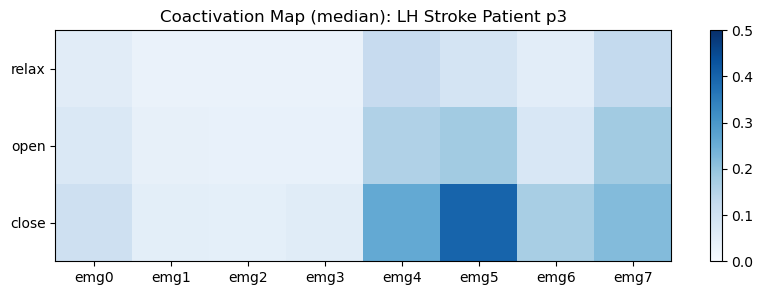

In [9]:
plot_coactivation_map(array_to_cm(df_raw[(df_raw.subject_id!='Augmen') & (df_raw.is_patient==True) & (df_raw.hand=='left')].iloc[3,:24].values).astype(float), title='LH Stroke Patient p3')


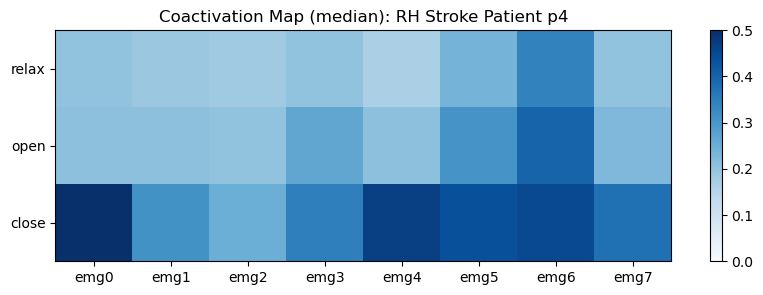

In [10]:
plot_coactivation_map(array_to_cm(df_raw[(df_raw.subject_id!='Augmen') & (df_raw.is_patient==True) & (df_raw.hand=='right')].iloc[3,:24].values).astype(float), title='RH Stroke Patient p4')


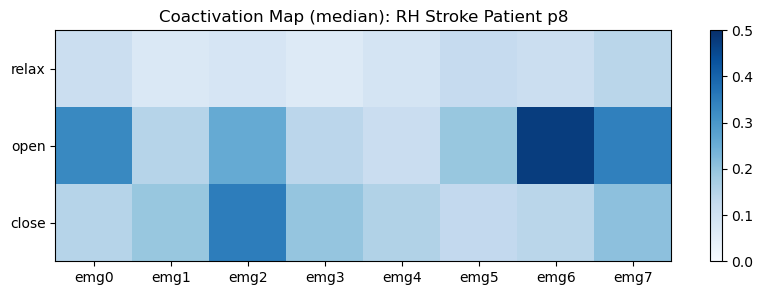

In [11]:
plot_coactivation_map(array_to_cm(df_raw[(df_raw.subject_id!='Augmen') & (df_raw.is_patient==True) & (df_raw.hand=='right')].iloc[19,:24].values).astype(float), title='RH Stroke Patient p8')


# KNN Exploration

### 1. verifying KNN on handedness for healthy

In [12]:
df_healthy = df_raw[df_raw.is_patient==False]
X = df_healthy.iloc[:,:24]
y = df_healthy.iloc[:, 24]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Healthy subjects: Accuracy for hand label: {accuracy:.2f}')

Healthy subjects: Accuracy for hand label: 0.87


In [13]:
df_test = pd.merge(X_test, df_healthy, how='left', on=X_test.columns.to_list())
df_test['hand_pred'] = y_pred
df_test

,gt0emg0,gt0emg1,gt0emg2,gt0emg3,gt0emg4,gt0emg5,gt0emg6,gt0emg7,gt1emg0,gt1emg1,...,gt2emg3,gt2emg4,gt2emg5,gt2emg6,gt2emg7,hand,is_patient,subject_id,n,hand_pred
0,0.021088,0.023307,0.023307,0.026637,0.029967,0.026637,0.023307,0.021088,0.049945,0.174251,...,0.153163,0.058824,0.048835,0.136515,0.183130,right,False,cl,13,right
1,0.018537,0.020488,0.020488,0.020488,0.021463,0.019512,0.018537,0.018537,0.026341,0.031220,...,0.212683,0.175610,0.204878,0.191220,0.067317,left,False,fa,11,left
2,0.015028,0.049468,0.108328,0.038197,0.019411,0.015654,0.013776,0.013150,0.078272,0.200376,...,0.165310,0.041327,0.068253,0.161553,0.147151,right,False,jp,13,right
3,0.041379,0.115271,0.056158,0.025616,0.026601,0.026601,0.028571,0.026601,0.073892,0.253202,...,0.138916,0.051232,0.032512,0.040394,0.107389,right,False,xw,11,right
4,0.024007,0.029548,0.031394,0.040628,0.022161,0.020314,0.020314,0.022161,0.089566,0.032318,...,0.191136,0.109880,0.168975,0.243767,0.574331,left,False,wx,13,left
5,0.018587,0.018587,0.020818,0.038662,0.148699,0.048327,0.018587,0.017100,0.026022,0.025279,...,0.172491,0.175465,0.121933,0.327881,0.079554,left,False,as,11,left
6,0.017241,0.018966,0.018966,0.024138,0.029310,0.064655,0.093966,0.027586,0.047414,0.025862,...,0.053448,0.067241,0.193103,0.231897,0.098276,right,False,ae,11,left
7,0.026352,0.030513,0.030513,0.029126,0.031900,0.029126,0.027739,0.027739,0.036061,0.051318,...,0.174757,0.267684,0.126214,0.062413,0.033287,left,False,im,11,left
8,0.014458,0.016867,0.016064,0.016064,0.016064,0.015261,0.015261,0.015261,0.016867,0.019277,...,0.175100,0.359036,0.153414,0.216064,0.051406,left,False,jo,11,left
9,0.048438,0.050000,0.051562,0.057813,0.032813,0.029687,0.028125,0.028125,0.101562,0.203125,...,0.125781,0.045312,0.034375,0.034375,0.085938,right,False,hr,11,right


In [14]:
# remove ae lol
df_healthy = df_raw[(df_raw.is_patient==False) & (df_raw.subject_id!='ae')]
X = df_healthy.iloc[:,:24]
y = df_healthy.iloc[:, 24]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Healthy subjects: Accuracy for hand label: {accuracy:.2f}')

Healthy subjects: Accuracy for hand label: 1.00


In [15]:
confusion_matrix(y_test, y_pred)

array([[ 4,  0],
       [ 0, 10]])

In [16]:
df_test = pd.merge(X_test, df_healthy, how='left', on=X_test.columns.to_list())
df_test['hand_pred'] = y_pred
df_test

,gt0emg0,gt0emg1,gt0emg2,gt0emg3,gt0emg4,gt0emg5,gt0emg6,gt0emg7,gt1emg0,gt1emg1,...,gt2emg3,gt2emg4,gt2emg5,gt2emg6,gt2emg7,hand,is_patient,subject_id,n,hand_pred
0,0.030197,0.038328,0.029036,0.029036,0.029036,0.029036,0.025552,0.024390,0.045296,0.092915,...,0.167247,0.047619,0.048780,0.217189,0.136469,right,False,gk,11,right
1,0.020256,0.023454,0.024520,0.022388,0.021322,0.021322,0.021322,0.021322,0.061834,0.137527,...,0.144989,0.049041,0.046908,0.125800,0.157783,right,False,cl,11,right
2,0.041379,0.115271,0.056158,0.025616,0.026601,0.026601,0.028571,0.026601,0.073892,0.253202,...,0.138916,0.051232,0.032512,0.040394,0.107389,right,False,xw,11,right
3,0.053846,0.043590,0.044872,0.035897,0.025641,0.023077,0.023077,0.023077,0.087179,0.166667,...,0.102564,0.034615,0.026923,0.026923,0.073077,right,False,hr,11,right
4,0.015028,0.049468,0.108328,0.038197,0.019411,0.015654,0.013776,0.013150,0.078272,0.200376,...,0.165310,0.041327,0.068253,0.161553,0.147151,right,False,jp,13,right
5,0.014774,0.016330,0.017107,0.015552,0.016330,0.016330,0.017107,0.014774,0.021773,0.024106,...,0.195179,0.637636,0.435459,0.485226,0.266719,left,False,jo,13,left
6,0.026062,0.039575,0.056950,0.025097,0.028958,0.029923,0.023166,0.023166,0.046332,0.089768,...,0.187259,0.059846,0.041506,0.030888,0.055019,right,False,yc,13,right
7,0.034598,0.092634,0.042411,0.027902,0.029018,0.027902,0.029018,0.027902,0.071429,0.262277,...,0.175223,0.060268,0.036830,0.053571,0.166853,right,False,xw,11,right
8,0.022989,0.022031,0.022989,0.057471,0.021073,0.018199,0.017241,0.018199,0.091954,0.235632,...,0.269157,0.052682,0.031609,0.290230,0.178161,right,False,is,11,right
9,0.022258,0.022258,0.028617,0.073132,0.152623,0.020668,0.016693,0.017488,0.024642,0.023847,...,0.162560,0.036566,0.126391,0.279014,0.302067,left,False,as,13,left


In [17]:
# ae predict, we expect to be all left
knn.predict(df_raw[df_raw.subject_id=='ae'].iloc[:,:24])

array(['left', 'left', 'left', 'left'], dtype=object)

In [18]:
# predict stroke patients
x_test_patient = df_raw[df_raw.is_patient==True].iloc[:,:24]
y_test_patient = df_raw[df_raw.is_patient==True].iloc[:, 24]
y_test_patient_pred = knn.predict(x_test_patient)
accuracy_score(y_test_patient, y_test_patient_pred)

0.86

In [19]:
stroke = df_raw[df_raw.is_patient==True]
stroke['hand_pred'] = y_test_patient_pred
stroke[stroke.hand != stroke.hand_pred]

/var/folders/yd/vqpl9gqn5nqfzr41g9_g0t940000gq/T/ipykernel_31604/2860824493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke['hand_pred'] = y_test_patient_pred


,gt0emg0,gt0emg1,gt0emg2,gt0emg3,gt0emg4,gt0emg5,gt0emg6,gt0emg7,gt1emg0,gt1emg1,...,gt2emg3,gt2emg4,gt2emg5,gt2emg6,gt2emg7,hand,is_patient,subject_id,n,hand_pred
0,0.034595,0.114595,0.069189,0.188108,0.165405,0.054054,0.044324,0.041081,0.035676,0.227027,...,0.267027,0.223243,0.072432,0.068649,0.063784,right,True,p1,13,left
0,0.070461,0.279133,0.184282,0.200542,0.189702,0.086721,0.070461,0.065041,0.067751,0.300813,...,0.495935,0.382114,0.116531,0.075881,0.067751,right,True,p1,11,left
0,0.094094,0.031031,0.031031,0.042042,0.031031,0.040040,0.062062,0.033033,0.095095,0.031031,...,0.112112,0.102102,0.095095,0.096096,0.074074,right,True,p4,12,left
0,0.119318,0.375000,0.153409,0.295455,0.312500,0.397727,0.142045,0.142045,0.153409,0.403409,...,0.500000,0.505682,0.568182,0.187500,0.267045,right,True,p4,13,left
0,0.059776,0.025529,0.063512,0.038605,0.036115,0.039851,0.204857,0.075342,0.115816,0.028020,...,0.212017,0.068493,0.066002,0.315068,0.132628,right,True,p7,12,left
0,0.033708,0.108146,0.234551,0.230337,0.242978,0.080056,0.035112,0.035112,0.032303,0.103933,...,0.311798,0.314607,0.103933,0.043539,0.047753,right,True,p1,13,left
0,0.055427,0.066975,0.101617,0.152425,0.207852,0.069284,0.053118,0.101617,0.057737,0.069284,...,0.196305,0.274827,0.085450,0.050808,0.050808,right,True,p1,12,left


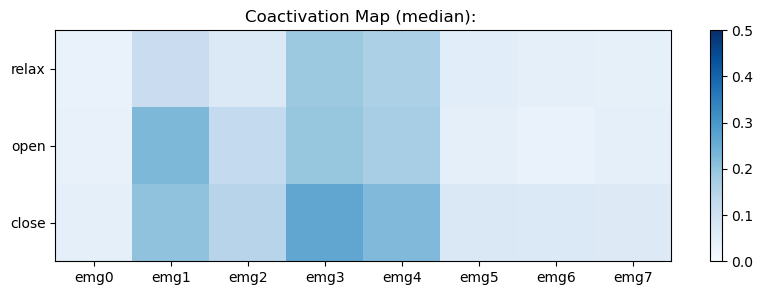

In [20]:
plot_coactivation_map(array_to_cm(stroke.iloc[2, :24].astype(float).values))

#### plots

In [21]:
tsne_input = df_healthy.iloc[:,:24].to_numpy()
data_tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(tsne_input)

data_tsne = pd.DataFrame(data_tsne, columns=['myx', 'myy'])

data_tsne['hand_pred'] = knn.predict(df_healthy.iloc[:,:24])
data_tsne['subject_ids'] = df_healthy['subject_id'].to_numpy()

fig = px.scatter(data_tsne, 
                    x='myx', y='myy',
                    color='hand_pred', text='subject_ids',
                    title='Hand classification model on healthy data'
)
fig.show()

In [22]:
tsne_input = df_healthy.iloc[:,:24].to_numpy()
data_tsne = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=3).fit_transform(tsne_input)

data_tsne = pd.DataFrame(data_tsne, columns=['myx', 'myy', 'myz'])

data_tsne['hand_pred'] = knn.predict(df_healthy.iloc[:,:24])
data_tsne['subject_ids'] = df_healthy['subject_id'].to_numpy()

fig = px.scatter_3d(data_tsne, 
                    x='myx', y='myy', z='myz', 
                    color='hand_pred', text='subject_ids',
                    title='Hand classification model on healthy data'
)
fig.show()

In [23]:
tsne_input = df_raw.iloc[:,:24].to_numpy()
data_tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(tsne_input)

data_tsne = pd.DataFrame(data_tsne, columns=['myx', 'myy'])

data_tsne['hand_pred'] = knn.predict(df_raw.iloc[:,:24])
data_tsne['subject_ids'] = df_raw['subject_id'].to_numpy()
data_tsne['symbol_is_patient'] = df_raw['is_patient'].map({False: 'circle', True: 'square'}).to_numpy()

fig = px.scatter(data_tsne, 
                    x='myx', y='myy',
                    color='hand_pred', 
                    symbol='symbol_is_patient', 
                    text='subject_ids',
                    title='2D TSNE: Hand classification model on all data'
)
fig.update_traces(textposition='top center')
fig.show()

In [24]:
tsne_input = df_raw.iloc[:,:24].to_numpy()
data_tsne = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=3).fit_transform(tsne_input)

data_tsne = pd.DataFrame(data_tsne, columns=['myx', 'myy', 'myz'])

data_tsne['hand_pred'] = knn.predict(df_raw.iloc[:,:24])
data_tsne['subject_ids'] = df_raw['subject_id'].to_numpy()
data_tsne['symbol_is_patient'] = df_raw['is_patient'].map({False: 'circle', True: 'square'}).to_numpy()

fig = px.scatter_3d(data_tsne, 
                    x='myx', y='myy', z='myz', 
                    color='hand_pred', 
                    symbol='symbol_is_patient', 
                    text='subject_ids',
                    title='3D TSNE: Hand classification model on all data'
)
fig.update_traces(marker=dict(size=3))
fig.show()

### 2. Map left to right and try to classify again

In [25]:
def mirror_left_right(df):
    df = pd.DataFrame(df).T
    if df.iloc[0,:]['hand']=='left':
        for gt in ['gt0','gt1','gt2']:

            df = df.rename(columns={
                gt + 'emg0': gt + 'temp0',
                gt + 'emg6': gt + 'emg0',
                gt + 'emg5': gt + 'emg1',
                gt + 'emg4': gt + 'emg2',
                gt + 'emg3': gt + 'emg3',  # emg3 remains unchanged
                gt + 'emg2': gt + 'emg4',
                gt + 'emg1': gt + 'emg5',
                gt + 'emg7': gt + 'emg7'   # emg7 remains unchanged
            })
            
            df = df.rename(columns={gt + 'temp0': gt + 'emg6'})
    
    return df.T[0]

In [26]:
df_left_mirrored = pd.DataFrame(df_raw.apply(mirror_left_right, axis=1))
df_left_mirrored

,gt0emg0,gt0emg1,gt0emg2,gt0emg3,gt0emg4,gt0emg5,gt0emg6,gt0emg7,gt1emg0,gt1emg1,...,gt2emg2,gt2emg3,gt2emg4,gt2emg5,gt2emg6,gt2emg7,hand,is_patient,n,subject_id
0,0.018537,0.019512,0.021463,0.020488,0.020488,0.020488,0.018537,0.018537,0.074146,0.187317,...,0.175610,0.212683,0.074146,0.044878,0.049756,0.067317,left,False,11,fa
0,0.016559,0.017479,0.019319,0.018399,0.019319,0.019319,0.017479,0.017479,0.057038,0.148114,...,0.121435,0.148114,0.060718,0.058878,0.087397,0.087397,left,False,11,fa
0,0.017350,0.026025,0.033912,0.030757,0.021293,0.018139,0.015773,0.015773,0.037855,0.117508,...,0.143533,0.170347,0.067823,0.045741,0.064669,0.064274,left,False,13,fa
0,0.024476,0.043706,0.059441,0.044580,0.027972,0.023601,0.019231,0.019231,0.042832,0.126748,...,0.156031,0.198427,0.081294,0.058566,0.088287,0.086538,left,False,13,fa
0,0.041379,0.115271,0.056158,0.025616,0.026601,0.026601,0.028571,0.026601,0.073892,0.253202,...,0.141872,0.138916,0.051232,0.032512,0.040394,0.107389,right,False,11,xw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.031191,0.056711,0.061437,0.026465,0.032136,0.029301,0.023629,0.022684,0.055766,0.059546,...,0.149338,0.224953,0.067108,0.040643,0.034972,0.058601,right,False,13,yc
0,0.020871,0.023593,0.019964,0.019056,0.018149,0.016334,0.016334,0.016334,0.093466,0.237750,...,0.099819,0.294011,0.058984,0.031760,0.203267,0.087114,right,False,11,is
0,0.022989,0.022031,0.022989,0.057471,0.021073,0.018199,0.017241,0.018199,0.091954,0.235632,...,0.074713,0.269157,0.052682,0.031609,0.290230,0.178161,right,False,11,is
0,0.018700,0.020481,0.028495,0.142476,0.042743,0.031167,0.026714,0.017809,0.033838,0.139804,...,0.089047,0.238646,0.076581,0.041852,0.118433,0.289403,right,False,13,is


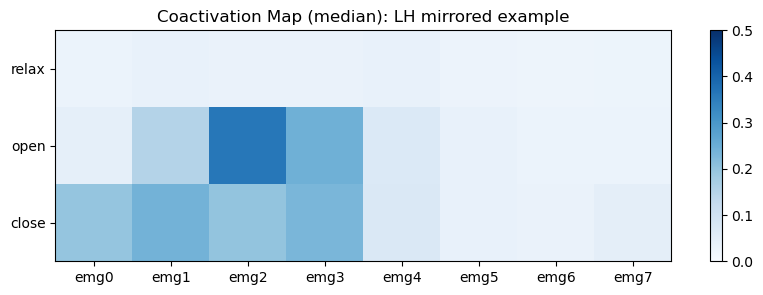

In [27]:
# check with random left mirrored person 
plot_coactivation_map(array_to_cm(df_left_mirrored[(df_left_mirrored.is_patient==False) & (df_left_mirrored.hand=='left')].iloc[12,:24].values).astype(float), title='LH mirrored example')

In [28]:
np.mean(df_left_mirrored[(df_left_mirrored.is_patient==False) & (df_left_mirrored.hand=='left')].iloc[:,:24], axis=0)

gt0emg0    0.021793
gt0emg1    0.026733
gt0emg2    0.046321
gt0emg3    0.037794
gt0emg4    0.032838
gt0emg5    0.025570
gt0emg6    0.021752
gt0emg7    0.021233
gt1emg0    0.049886
gt1emg1    0.147444
gt1emg2    0.343271
gt1emg3    0.166781
gt1emg4    0.050653
gt1emg5    0.033734
gt1emg6    0.044455
gt1emg7    0.055960
gt2emg0    0.214464
gt2emg1    0.185086
gt2emg2    0.202907
gt2emg3    0.188479
gt2emg4    0.070847
gt2emg5    0.049485
gt2emg6    0.074919
gt2emg7    0.172024
dtype: float64

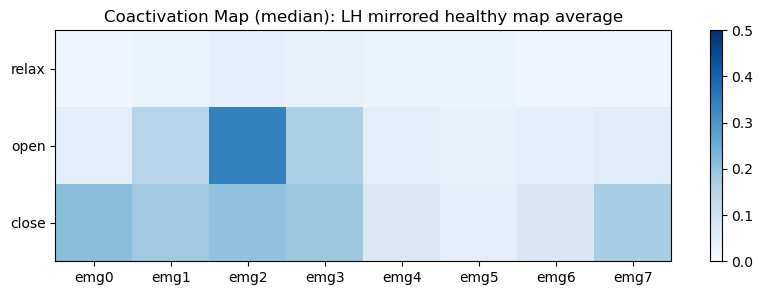

In [29]:
plot_coactivation_map(array_to_cm(np.mean(df_left_mirrored[(df_left_mirrored.is_patient==False) & (df_left_mirrored.hand=='left')].iloc[:,:24].values, axis=0)), title='LH mirrored healthy map average')

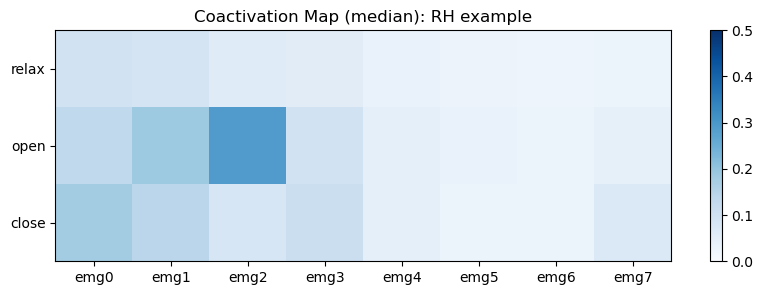

In [30]:
# check right is still right
plot_coactivation_map(array_to_cm(df_left_mirrored[(df_left_mirrored.is_patient==False) & (df_left_mirrored.hand=='right')].iloc[10,:24].values).astype(float), title='RH example')

knn

In [31]:
df_healthy_left_mirrored = df_left_mirrored[df_left_mirrored.is_patient==False]

In [32]:
X = df_healthy_left_mirrored.iloc[:,:24]
y = df_healthy_left_mirrored.iloc[:, 24]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Healthy subjects: Accuracy for hand label with left mirrored: {accuracy:.5f}')

Healthy subjects: Accuracy for hand label with left mirrored: 0.66667


In [33]:
tsne_input = df_healthy_left_mirrored.iloc[:,:24].to_numpy()
data_tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(tsne_input)

data_tsne = pd.DataFrame(data_tsne, columns=['myx', 'myy'])

data_tsne['hand_pred'] = knn.predict(df_healthy_left_mirrored.iloc[:,:24])
data_tsne['subject_ids'] = df_healthy_left_mirrored['subject_id'].to_numpy()

fig = px.scatter(data_tsne, 
                    x='myx', y='myy',
                    color='hand_pred', text='subject_ids',
                    title='Hand classification model on healthy data'
)
fig.show()

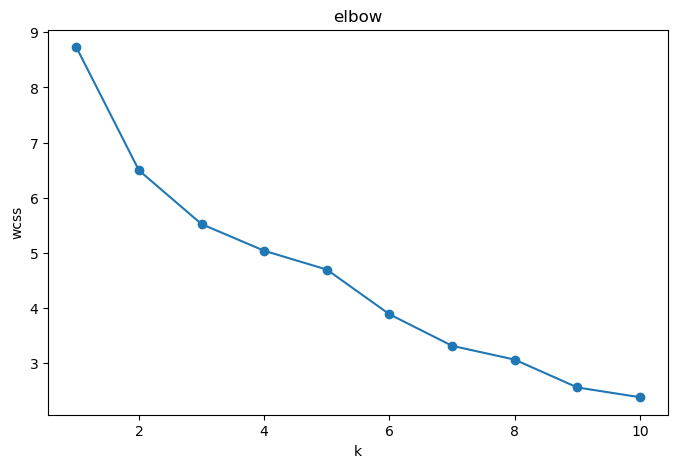

In [34]:
# elbow method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('elbow')
plt.xlabel('k')
plt.ylabel('wcss')
plt.show()

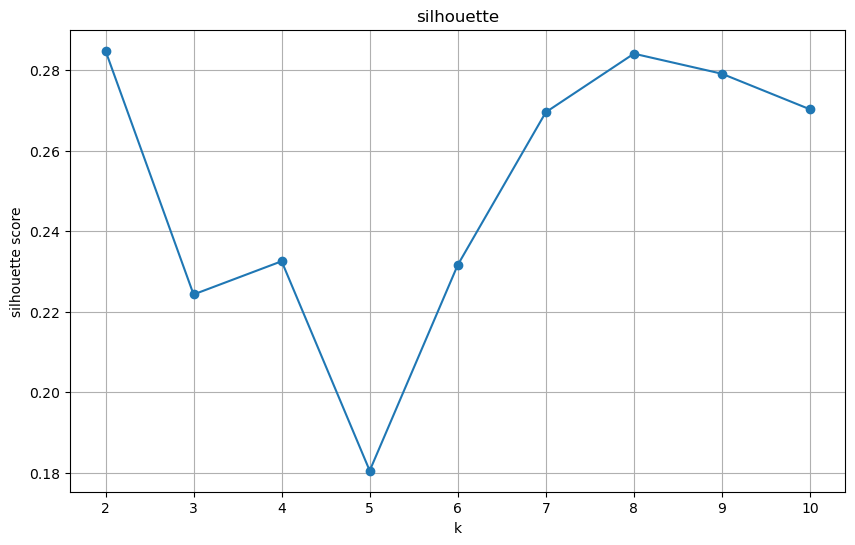

In [35]:
silhouette_scores = []
for k in range(2, 11):  # Silhouette score is not defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('silhouette')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

/var/folders/yd/vqpl9gqn5nqfzr41g9_g0t940000gq/T/ipykernel_31604/3071116175.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



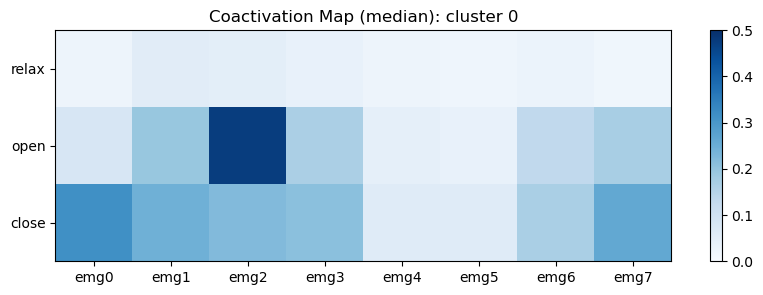

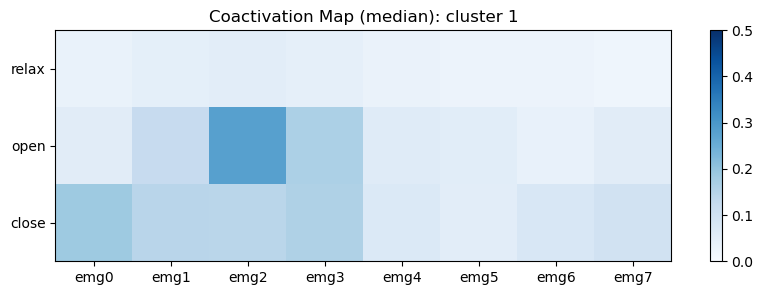

In [36]:
kmeans = KMeans(n_clusters=2,         # Number of clusters
                 init='k-means++',    # Centroid initialization
                 max_iter=300,        # Maximum iterations
                 n_init=10,           # Number of initializations
                 tol=1e-4,    
                 random_state=42,    
                 algorithm='lloyd')
df_healthy_left_mirrored['cluster'] = kmeans.fit_predict(X)
kmeans.fit(X)

labels = kmeans.predict(X)
for i in range(len(kmeans.cluster_centers_)):
    cluster_center = kmeans.cluster_centers_[i]
    plot_coactivation_map(array_to_cm(cluster_center), title="cluster " + str(i))

In [37]:
df_healthy_left_mirrored.cluster.value_counts()

cluster
1    45
0    26
Name: count, dtype: int64

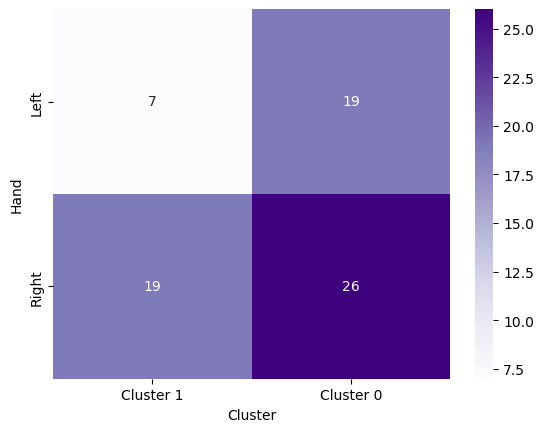

In [38]:
import seaborn as sns
cm = confusion_matrix(np.where(df_healthy_left_mirrored.hand.to_numpy()=='right', 1, 0), df_healthy_left_mirrored.cluster.to_numpy())
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=["Cluster 1", "Cluster 0"], yticklabels=["Left", "Right"])
plt.xlabel("Cluster")
plt.ylabel("Hand")
plt.show()

### 3. Classify is_patient (True/False)

In [39]:
X = df_raw.iloc[:,:24]
y = df_raw.iloc[:, 25]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Healthy subjects: Accuracy for is_patient label: {accuracy:.2f}')

Healthy subjects: Accuracy for is_patient label: 0.88


In [40]:
tsne_input = df_raw.iloc[:,:24].to_numpy()
data_tsne = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=3).fit_transform(tsne_input)

data_tsne = pd.DataFrame(data_tsne, columns=['myx', 'myy', 'myz'])

data_tsne['is_patient_predict'] = knn.predict(df_raw.iloc[:,:24])
data_tsne['subject_ids'] = df_raw['subject_id'].to_numpy()

fig = px.scatter_3d(data_tsne, 
                    x='myx', y='myy', z='myz', 
                    color='is_patient_predict', 
                    text='subject_ids',
                    title='3D TSNE: Stroke vs Healthy classification model on all data'
)
fig.update_traces(marker=dict(size=3))
fig.show()

#### try with left hand mirrored data

In [41]:
X = df_left_mirrored.iloc[:,:24]
y = df_left_mirrored.iloc[:, 25]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'All subjects with left coactivations mirrored: Accuracy for is_patient label: {accuracy:.2f}')

All subjects with left coactivations mirrored: Accuracy for is_patient label: 0.96


In [42]:
tsne_input = df_raw.iloc[:,:24].to_numpy()
data_tsne = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=3).fit_transform(tsne_input)

data_tsne = pd.DataFrame(data_tsne, columns=['myx', 'myy', 'myz'])

data_tsne['is_patient_predict'] = knn.predict(df_raw.iloc[:,:24])
data_tsne['subject_ids'] = df_raw['subject_id'].to_numpy()

fig = px.scatter_3d(data_tsne, 
                    x='myx', y='myy', z='myz', 
                    color='is_patient_predict', 
                    text='subject_ids',
                    title='3D TSNE: Stroke vs Healthy classification model on all data with left hand cms mirrored'
)
fig.update_traces(marker=dict(size=3))
fig.show()

### visualizing deviation from "center"

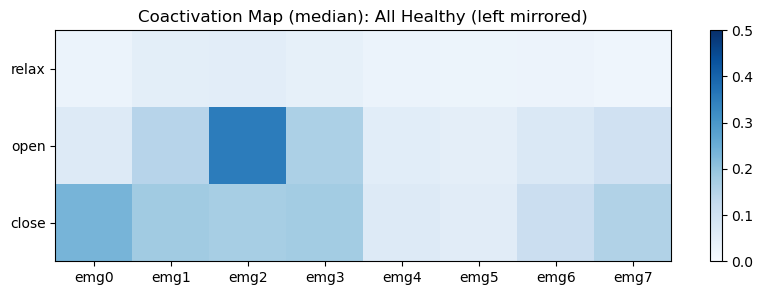

In [43]:
plot_coactivation_map(array_to_cm(np.mean(df_healthy_left_mirrored.iloc[:,:24], axis=0).values), title='All Healthy (left mirrored)')

In [44]:
import matplotlib.gridspec as gridspec
from matplotlib.colors import Normalize
import matplotlib.cm as cm

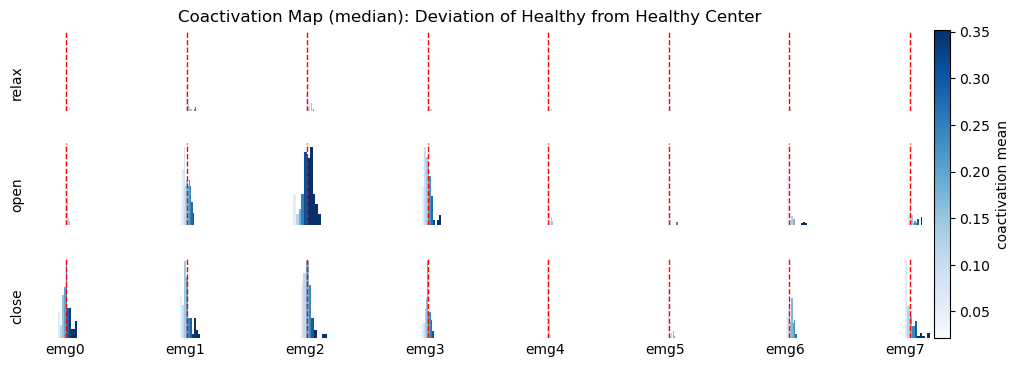

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# Define the function to plot coactivation map with histograms and matching heatmap colors
def plot_coactivation_map_with_histograms(identities, main_identity, metric='median', title=''):
    fig = plt.figure(figsize=(12, 4))
    outer_gs = gridspec.GridSpec(1, 1, figure=fig)
    ax = fig.add_subplot(outer_gs[0, 0])
    ax.set_title('Coactivation Map (' + metric + '): ' + title)
    ax.axis("off")  # Turn off the main axis

    # Create a GridSpec for plotting histograms in each cell
    gs = gridspec.GridSpecFromSubplotSpec(3, 8, subplot_spec=ax.get_subplotspec(), wspace=0.4, hspace=0.4)

    # Normalize the main_identity values to a colormap
    norm = Normalize(vmin=np.min(main_identity), vmax=np.max(main_identity))
    cmap = cm.Blues  # Choose a colormap (e.g., 'Blues')

    # Plot histograms in each cell with color matching the heatmap of main_identity
    for row in range(3):
        for col in range(8):
            # Calculate actual values for each identity and deviations
            actual_values = [identity[row, col] for identity in identities]
            deviations = [value - main_identity[row, col] for value in actual_values]
            
            # Calculate histogram bins and color each bin based on midpoint value
            counts, bins = np.histogram(deviations, bins=10)
            
            # Plot each bin individually with its corresponding color
            cell_ax = fig.add_subplot(gs[row, col])
            for i in range(len(bins) - 1):
                # Calculate midpoint of the bin, adjust it by the main_identity value, and normalize for color
                bin_midpoint = main_identity[row, col] + (bins[i] + bins[i + 1]) / 2
                bin_color = cmap(norm(bin_midpoint))
                
                # Plot individual bin with its specific color
                cell_ax.bar(bins[i], counts[i], width=(bins[i + 1] - bins[i]), color=bin_color, edgecolor="none", align="edge")
            
            # Add a vertical line for the zero difference (no deviation)
            cell_ax.axvline(0, color="red", linestyle="--", linewidth=1)
            
            # Set consistent x-axis limits across all histograms for comparable scale
            cell_ax.set_xlim(-1, 1)  # Adjust these limits based on data range
            
            # Remove ticks for a cleaner look
            cell_ax.set_xticks([])
            cell_ax.set_yticks([])
            
            # Remove extra spines for a cleaner look
            cell_ax.spines['top'].set_visible(False)
            cell_ax.spines['right'].set_visible(False)
            cell_ax.spines['left'].set_visible(False)
            cell_ax.spines['bottom'].set_visible(False)

    # Add row and column labels like in a heatmap
    row_labels = ['relax', 'open', 'close']
    col_labels = [f'emg{i}' for i in range(8)]
    
    # Place row labels on the left side
    for row, label in enumerate(row_labels):
        fig.text(0.12, 0.75 - (row * 0.28), label, va='center', ha='center', fontsize=10, rotation='vertical')

    # Place column labels at the bottom
    for col, label in enumerate(col_labels):
        fig.text(0.16 + (col * 0.1), 0.08, label, va='center', ha='center', fontsize=10)

    # Add a single colorbar representing the main_identity values
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.02, pad=0.02, label='coactivation mean')

    plt.show()

# Sample data for demonstration
main_identity = np.mean(df_healthy_left_mirrored.iloc[:,:24], axis=0).values.reshape(3,8)  # Random data for the main identity heatmap
identities = df_healthy_left_mirrored.iloc[:,:24].values.reshape(71,3,8)

# Run the function
plot_coactivation_map_with_histograms(identities, main_identity, title='Deviation of Healthy from Healthy Center')


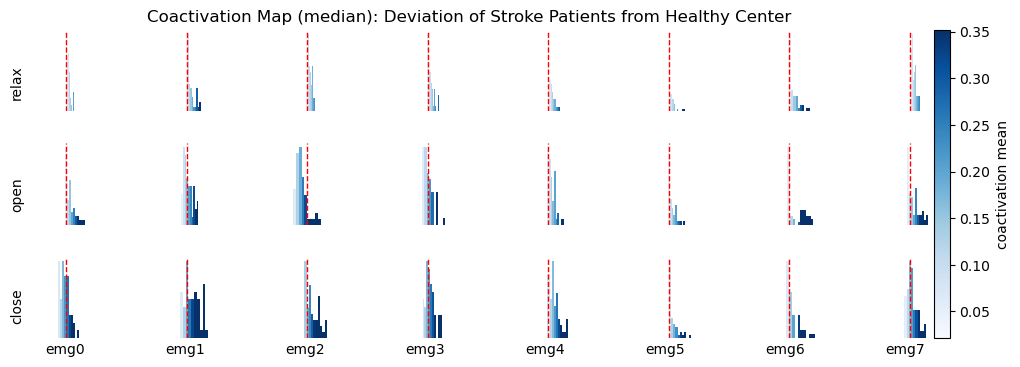

In [46]:
df_patients_left_mirrored = df_left_mirrored[df_left_mirrored.is_patient==True]
stroke_identities = df_patients_left_mirrored.iloc[:,:24].values.reshape(len(df_patients_left_mirrored),3,8)
plot_coactivation_map_with_histograms(stroke_identities, main_identity, title='Deviation of Stroke Patients from Healthy Center')

### 5. Stratified by classes

healthy, left mirrored

In [47]:
# relax
X = df_healthy_left_mirrored.iloc[:,:7].values

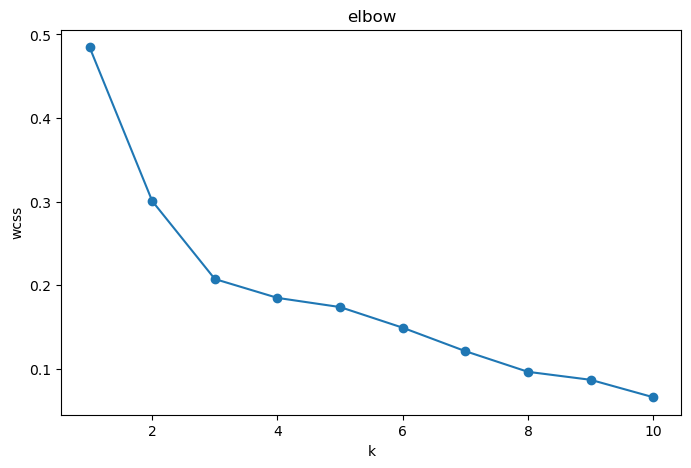

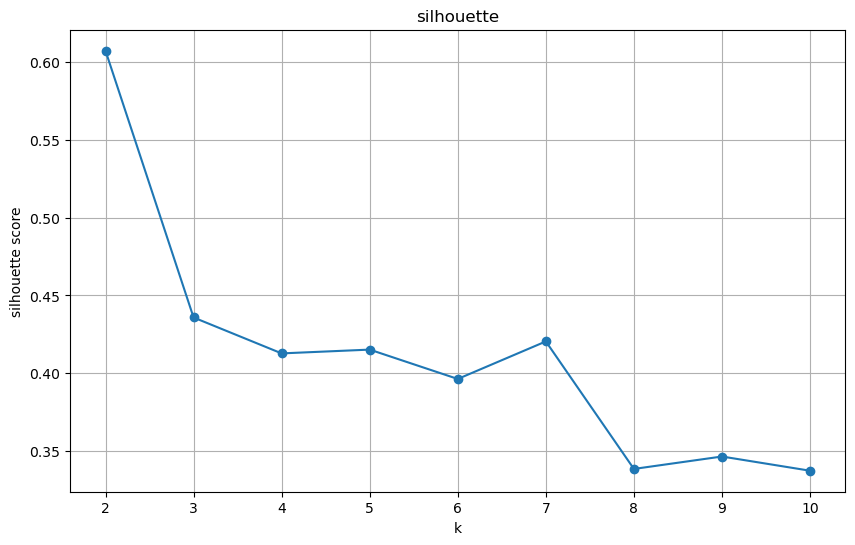

In [48]:
# elbow method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('elbow')
plt.xlabel('k')
plt.ylabel('wcss')
plt.show()

silhouette_scores = []
for k in range(2, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('silhouette')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()